# Project Final Report: Acidity and Quality of Red and White Wines

### Group 12

## Introduction

### Background Information and Question

All wines are acidic, with pH between 3 and 4. However, white wines are usually more acidic than red wines. White wines' pH generally falls between 3 and 4 while for red wines between 3.3 and 3.6.

The acidic level has significant impact on the fermentation process of a wine and additives, such as sulfur dioxide. Consequently, acidity can significantly influence the taste, colour, and smell of a wine.

In this project, we are asking the following questions:
- Does the white variant of the Portuguese “Vinho Verde” wine has the same mean pH level as the red variant?
- Does the white variant of the Portuguese “Vinho Verde” wine has the same proportion of good quality ratings as the red variant?

Our population of interest is the Portuguese “Vinho Verde” wine and the data used in this project is collected from samples of red and white variants of the "Vinho Verde" wine.

Our point estimates are the mean difference between the pH level of red and white “Vinho Verde” wines and the proportion difference between the good quality ratings of red and white variants. 

Let $m_{1}$ be the mean pH level of the red variant and $m_{2}$ the mean pH level of the white variant. Then our null hypothesis is that $m_{1} = m_{2}$ and the alternative hypothesis is that $m_{1} \neq m_{2}$.

Let $p_{1}$ be the proportion of red wines with a good rating and $p_{2}$ the proportion of white wines with a good rating. Then our null hypothesis is that $p_{1} = p_{2}$ and the alternative hypothesis is that $p_{1} \neq p_{2}$.

### Dataset Used

The dataset that will be used is the Wine Quality dataset, which can be found [here](https://archive.ics.uci.edu/dataset/186/wine+quality). This dataset consists of two smaller datasets one related to the red variant of the “Vinho Verde” wine and the other related to the white variant.

The dataset was created using red and white wine samples of the “Vinho Verde” wine and each row includes objective tests, such as density, pH level, and alcohol, and one subjective test for the quality of a sample. The quality column is a discrete variable ranging from 0 to 10 with 0 being very bad and 10 being very excellent and is calculated by taking the median of at least 3 evaluations for the sample from wine experts.

## Methods and Results

In [50]:
set.seed(100)

library(cowplot)
library(digest)
library(gridExtra)
library(infer)
library(repr)
library(tidyverse)
library(datateachr)
library(broom)
library(GGally)

### Reading, Cleaning, and Wrangling Data

First, we the file from the web using the `read_csv` function. The dataset is divided into two smaller datasets, one for red wine samples and one for white wine samples. Here we create the `type` column to indicate the wine variant of each data point and later in our analysis we combine these two datasets and select relevant columns.

In [51]:
# Demonstrate that the dataset can be read from the web into R

url_1 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
url_2 <- "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv"

red_wine <- read.csv(url_1, sep=';') |>
    mutate(type = "Red")

white_wine <- read.csv(url_2, sep=';') |>
    mutate(type = "White")

print("Table 1: Red wine dataset.")
head(red_wine)

print("Table 2: White wine dataset.")
head(white_wine)

[1] "Table 1: Red wine dataset."


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,Red


[1] "Table 2: White wine dataset."


,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,type
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
1,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6,White
2,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6,White
3,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,White
4,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,White
5,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6,White
6,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6,White


### Wine Variant and pH Level

In this subsection, we conduct our first hypothesis of this report via asymptotics. We will use a significance level value of $10\%$ and construct a $90\%$ confidence interval since this is the standard value used in this research field.

Let $m_{1}$ be the mean pH level of the red variant of the "Vinho Verde" wine and $m_{2}$ the mean pH level of the white variant. Then our null hypothesis is that $$H_0: m_{1} = m_{2}$$ $$H_1: m_{1} \neq m_{2}$$.

First, we combine the red and white wines data, and select the relevant columns (i.e. type and pH columns).

In [52]:
# Combining the red wine and white wine data

wine_data <- rbind(red_wine, white_wine) |>
    select(type, pH)

print("Table 3: Combined red and white wine datasets with type and pH columns.")
head(wine_data)

[1] "Table 3: Combined red and white wine datasets with type and pH columns."


,type,pH
,<chr>,<dbl>
1,Red,3.51
2,Red,3.20
3,Red,3.26
4,Red,3.16
5,Red,3.51
6,Red,3.51


To visualize our data we plot the distribution of pH level across red and wine variants using a histogram and also a boxplot. As we can see from the plots, the pH distribution for both wine types are symmetric, unimodal, and similar to a Normal distribution. Moreover, we can notice that the center of the distribution for the red variant is to the right of the one for the white variant.

[1] "Figure 1: pH level distribution of each wine type."


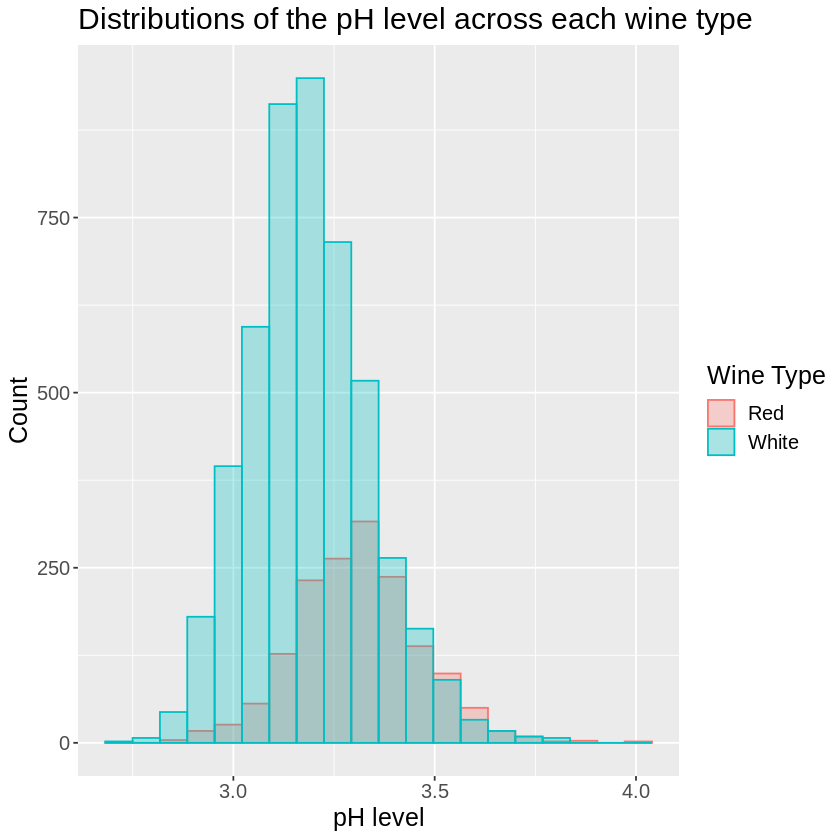

In [53]:
# Distribution of the pH level of each type from the raw dataset 

ph_dis <- wine_data |>
    ggplot() +
    aes(x = pH, fill = type, colour = type) +
    geom_histogram(alpha = 0.3, position = 'identity', bins = 20) +
    labs(x = "pH level",
         y = "Count",
         fill = "Wine Type",
         colour = "Wine Type",
         title = "Distributions of the pH level across each wine type") +
    theme(text = element_text(size = 15),
          plot.title = element_text(size = 18))
          
print("Figure 1: pH level distribution of each wine type.")
ph_dis

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


[1] "Figure 2: pH level boxplot of each wine type."


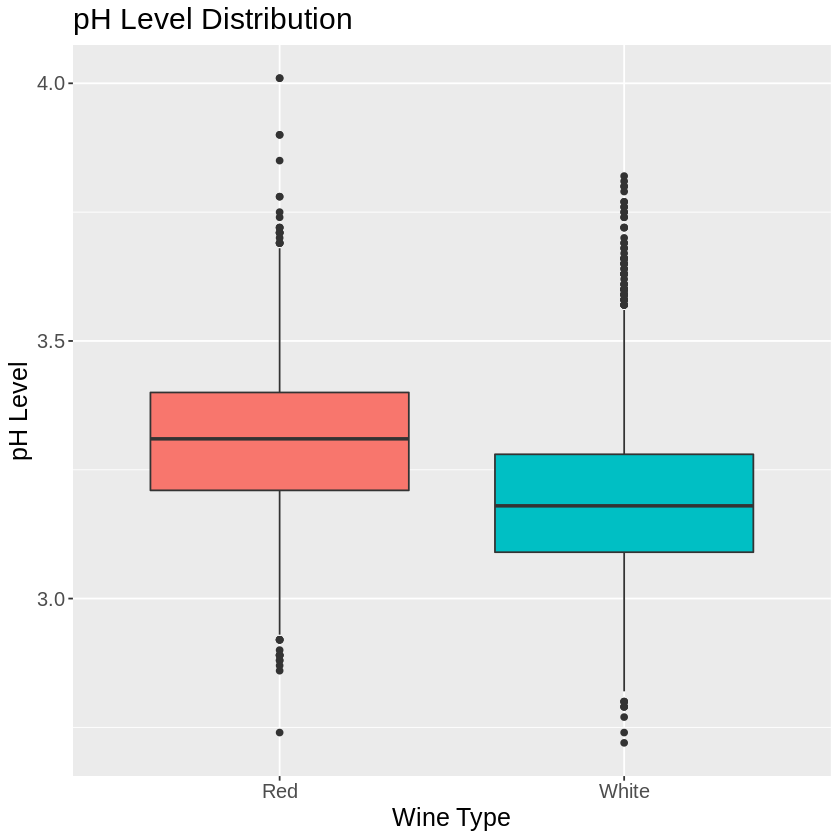

In [54]:
# Boxplot of the pH level of both wine types

ph_level_boxplots <-
    wine_data %>% 
    ggplot() +
    geom_boxplot(aes(x = type, y = pH, fill = type)) +
    theme(text = element_text(size = 15)) +
    ggtitle('pH Level Distribution') + 
    xlab('Wine Type') + 
    ylab('pH Level') + 
    guides(fill = FALSE)

print("Figure 2: pH level boxplot of each wine type.")
ph_level_boxplots

Now, we compute the sample mean, SD, variance, and count for each group in our sample data. Note that the sample mean for red wines is greater than the one for white wines and the variances are very similar, as we expected from our plots above.

In [55]:
# The mean and sd of each type of wine

wine_data_summary <- wine_data |>
    filter(!is.na(pH)) |>
    group_by(type) |>
    summarize(sample_mean = mean(pH),
              sample_sd = sd(pH),
              sample_var = var(pH),
              n = n())

print("Table 4: Sample data summary.")
wine_data_summary

[1] "Table 4: Sample data summary."


type,sample_mean,sample_sd,sample_var,n
<chr>,<dbl>,<dbl>,<dbl>,<int>
Red,3.311113,0.1543865,0.02383518,1599
White,3.188267,0.1510006,0.02280118,4898


Using our data summary above, we compute the observed mean difference and SD difference in our sample data.

In [56]:
# The difference in mean and sd

diff_mean_sd <- tibble(
    diff_mean = wine_data_summary$sample_mean[1] - wine_data_summary$sample_mean[2],
    diff_sd = wine_data_summary$sample_sd[1] - wine_data_summary$sample_sd[2]
)

print("Table 5: Mean difference and SD difference of sample data.")
diff_mean_sd

[1] "Table 5: Mean difference and SD difference of sample data."


diff_mean,diff_sd
<dbl>,<dbl>
0.1228466,0.003385865


In the cell below, we calculate a $90\%$ confidence interval for the mean difference using asymptotics. We use the SE of our sample since the population variance is unknown. As we can see, the hypothesized value of zero falls outside of the interval. Thus, we expect to reject the null hypothesis.

In [22]:
# Calculate the mean difference and its standard error

mean_diff_stat <- tibble(
    diff_mean = wine_data_summary$sample_mean[1] - wine_data_summary$sample_mean[2],
    diff_sd = wine_data_summary$sample_sd[1] - wine_data_summary$sample_sd[2],
    std_error = sqrt(wine_data_summary$sample_var[1]/wine_data_summary$n[1] +
                     wine_data_summary$sample_var[2]/wine_data_summary$n[2])
)

print("Table 6: Computed sample SE.")
mean_diff_stat

# Obtaining confidence intervals based on the CLT
wine_diff_means_clt_ci <- 
    tibble(
        lower_ci_clt= wine_data_summary$sample_mean[1] - wine_data_summary$sample_mean[2] - qnorm(0.95) 
        * sqrt(wine_data_summary$sample_var[1]/wine_data_summary$n[1] +
                     wine_data_summary$sample_var[2]/wine_data_summary$n[2]),
        upper_ci_clt = wine_data_summary$sample_mean[1] - wine_data_summary$sample_mean[2] + qnorm(0.95) 
        * sqrt(wine_data_summary$sample_var[1]/wine_data_summary$n[1] +
                     wine_data_summary$sample_var[2]/wine_data_summary$n[2])) 

print("Table 7: 90% confidence interval for mean difference.")
wine_diff_means_clt_ci

[1] "Table 6: Computed sample SE."


diff_mean,diff_sd,std_error
<dbl>,<dbl>,<dbl>
0.1228466,0.003385865,0.004422839


[1] "Table 7: 90% confidence interval for mean difference."


lower_ci_clt,upper_ci_clt
<dbl>,<dbl>
0.1155716,0.1301215


Now, we calculate the test statistic for our hypothesis test.

In [20]:
# Calculate the Test Statistic
test_statistic<- 
  (wine_data_summary$sample_mean[1] - wine_data_summary$sample_mean[2]) /
    sqrt(wine_data_summary$sample_var[1]/ wine_data_summary$n[1] +
         wine_data_summary$sample_var[2]/ wine_data_summary$n[2])

print("Computed test statistic.")
test_statistic

[1] "Computed test statistic."


[1] 27.7755

Here we compute the degree of freedom of our data and we use the formula below since this is a 2-sample t-test. Having the test statistic and the degree of freedom, we can now compute the p-value of our test. Note that the p-value is very close to zero. Thus, we say that the p-value is $< 0.001$ since a p-value of zero, which would imply making a Type I error is impossible, is not reasonable. Therefore, we reject the null hypothesis at the $10\%$ significance level. This result is consistent with the confidence interval we constructed.

In [59]:
# Calculate the degree of freedom 

df <- ((wine_data_summary$sample_var[1]/wine_data_summary$n[1]) + 
       (wine_data_summary$sample_var[2]/wine_data_summary$n[2]))^2 / 
        ((wine_data_summary$sample_var[1]^2/ (wine_data_summary$n[1]^2 *(wine_data_summary$n[1] - 1))) + 
         (wine_data_summary$sample_var[2]^2/ (wine_data_summary$n[2]^2 *(wine_data_summary$n[2]-1))))


# Calculate the P-value

p_value <- 2 * pt(test_statistic, df, lower.tail = FALSE)

print("Computed p-value.")
p_value

[1] "Computed p-value."


[1] 2.342265e-149

To conclude this analysis, we perform the test above using the `t.test` function and use the `tidy` function to display the results in the table below.
* We set `red_sample` as the 1st argument and `white_sample` as the 2nd argument for the `t.test()` function
* Because this is a two sided test, we set `alternative = "two.sided"`
* Since we are using a significance level of $10%$, we set `conf.level = 0.9`

In [60]:
# Using t.test()

red_sample <- wine_data %>% filter(type == "Red") %>% pull(pH)
white_sample <- wine_data %>% filter(type == "White") %>% pull(pH)

# Perform t-test
t_test <- tidy(t.test(x = red_sample,
                           y = white_sample,
                           alternative = "two.sided",
                           conf.level = 0.9))

print("Table 8: Summary of t.test results.")
t_test

[1] "Table 8: Summary of t.test results."


estimate,estimate1,estimate2,statistic,p.value,parameter,conf.low,conf.high,method,alternative
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
0.1228466,3.311113,3.188267,27.7755,2.342265e-149,2667.073,0.1155691,0.130124,Welch Two Sample t-test,two.sided


We can see that the confidence intervals obtained from the 2 methods: CLT and T-test are very similar. 

### Wine Variant and Quality

In this subsection, we conduct our second hypothesis of this report via simulation. We will use a significance level value of $10\%$ and construct a $90\%$ confidence interval since this is the standard value used in this research field.

Let $p_{1}$ be the proportion of "Vinho Verde" red wines with a good rating and $p_{2}$ the proportion of "Vinho Verde" white wines with a good rating. Then $$H_0: p_{1} = p_{2} $$ $$H_1: p_{1} \neq p_{2}.$$

First, we combine the red and white wines data, and select the relevant columns (i.e. type and quality columns).

In [61]:
# Combining the red wine and white wine data, and selecting relevant columns

rating_data <- rbind(red_wine, white_wine) |>
    select(type, quality)

print("Table 9: Combined red and white wine datasets with type and quality columns.")
head(rating_data)

[1] "Table 9: Combined red and white wine datasets with type and quality columns."


,type,quality
,<chr>,<int>
1,Red,5
2,Red,5
3,Red,5
4,Red,6
5,Red,5
6,Red,5


Next, we map the values of the quality column as follows. If the value is between 0 and 5, then the quality is bad, otherwise it is good.

In [62]:
# Grouping quality values from 0 to 5 as "bad" and values 6 to 10 as "good"

good_rating <- c(6:10)
bad_rating <- c(0:5)

group_rating_data <- rating_data |>
    mutate(quality = case_when(quality %in% good_rating ~ "Good",
                               quality %in% bad_rating ~ "Bad"))

print("Table 10: Data with grouped quality ratings.")
head(group_rating_data)

[1] "Table 10: Data with grouped quality ratings."


,type,quality
,<chr>,<chr>
1,Red,Bad
2,Red,Bad
3,Red,Bad
4,Red,Good
5,Red,Bad
6,Red,Bad


Now, after wrangling the data, we compute how many sample are good and how many are bad for each type of wine. We can see the result in the table below.

In [63]:
# Checking how many samples are in each group

group_rating_data_summary <- group_rating_data |>
    group_by(type, quality) |>
    tally() |>
    spread(type, n)

print("Table 11: Sample data summary.")
group_rating_data_summary

[1] "Table 11: Sample data summary."


quality,Red,White
<chr>,<int>,<int>
Bad,744,1640
Good,855,3258


To visualize this summary, we create a stacked bar graph for the data. As we can see, in our sample, the proportion of white wines with a good rating is larger than the proportion of red wines with a good rating.

[1] "Figure 3: Stacked bar graph of sample data."


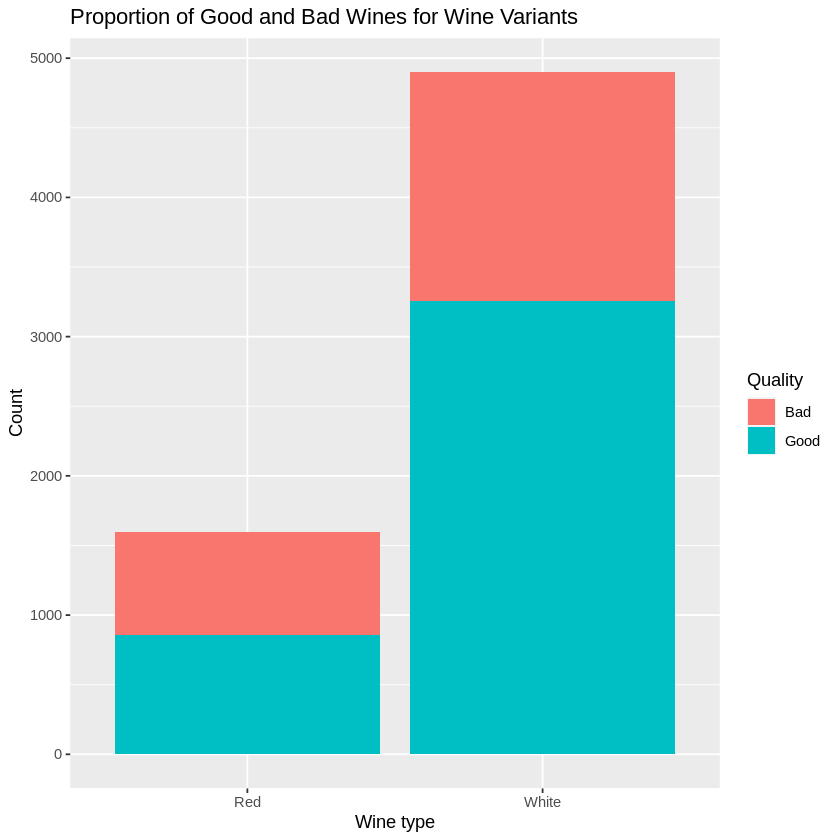

In [64]:
# Plotting the proportion of good and bad wines for each wine variant

corr_quality_type_plot <- ggplot(group_rating_data, aes(x = type, y = ..count.., fill = quality)) + 
    geom_bar() +
    labs(x = "Wine type",
         y = "Count",
         fill = "Quality",
         colour = "Quality",
         title = "Proportion of Good and Bad Wines for Wine Variants")

print("Figure 3: Stacked bar graph of sample data.")
corr_quality_type_plot

In the cell below, we calculate the observed proportion difference from our sample using the `infer` package workflow. As expected from the plot above, the observed proportion difference in our sample is negative, which means $\hat{p}_1 < \hat{p}_2.$

In [65]:
# Calculating observed test statistic

obs_diff_prop <- group_rating_data %>%
    specify(formula = quality ~ type, success = "Good") %>%
    calculate(stat = 'diff in props', order = c("Red", "White"))

print("Table 12: Calculated difference in proportion.")
obs_diff_prop

[1] "Table 12: Calculated difference in proportion."


stat
<dbl>
-0.1304603


Using the `infer` package workflow again, we simulate the null distribution. We specify the response variable to be the quality column, the explanatory variable to be the type column, and the target value to be wines with a good rating. Then we hypothesize the null hypothesis, generate $1000$ samples from the null distribution, and calculate the difference in proportion for each sample.

In [66]:
# Simulating the null distribution

rating_null_distribution <- group_rating_data %>%
    specify(formula = quality ~ type, success = "Good") %>%
    hypothesize(null = 'independence') %>%
    generate(reps = 1000, type = "permute") %>%
    calculate(stat = 'diff in props', order = c("Red", "White"))

print("Table 13: Simulated null distribution data.")
head(rating_null_distribution)

[1] "Table 13: Simulated null distribution data."


replicate,stat
<int>,<dbl>
1,-0.0134928910
2,-0.0176406702
3,-0.0018791093
4,0.0113937840
5,0.0006095582
6,-0.0110042235


In the plot below, we can see a histogram of the simulated null distribution, a vertical red line indicating our observed proportion difference, and the p-value of the test shaded as red. As we can observe from the plot, the p-value seems to be very small.

[1] "Figure 4: Null distribution histogram."


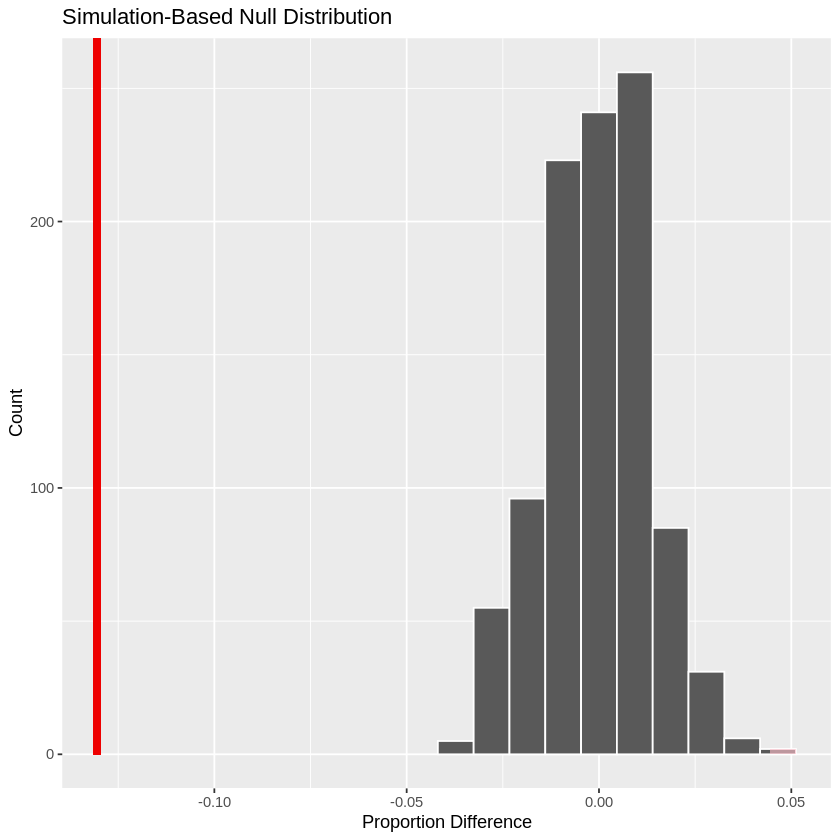

In [67]:
# Plotting the simulated null distribution

rating_null_dist_plot <- rating_null_distribution %>%
    visualize(bins = 10) +
    shade_pvalue(obs_stat = obs_diff_prop, direction = 'two-sided') +
    labs(x = 'Proportion Difference', y = "Count")

print("Figure 4: Null distribution histogram.")
rating_null_dist_plot

Now, we get the exact p-value using our simulated null distribution and the observed statistic. As expected from the graph above, the p-value is very small and the output is $0$. Since we get a p-value of $0$, reporting it as $0$ would not be reasonable because this would suggest that making a Type I error is impossible. Thus, we say that the p-value is $< 0.001$. Therefore, we reject the null hypothesis at the $10\%$ significance level.

In [68]:
# Getting the p-value from the simulated null distribution

prop_diff_p_value <- rating_null_distribution %>%
    get_pvalue(obs_stat = obs_diff_prop, direction = 'two-sided')

print("Table 14: Calculated p-value.")
prop_diff_p_value

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


[1] "Table 14: Calculated p-value."


p_value
<dbl>
0


To conclude this subsection, we calculate a $90\%$ confidence interval also via simulation. Once again, we use the `infer` package workflow to achieve this. First, we generate the bootstrap distribution of our sample by specifying the response, explanatory, and target value, then generating $1000$ bootstrap samples from our data and calculating the difference in proportion of each sample. Then, we use the `get_ci` function to construct the $90\%$ confidence interval using the percentile method. Finally, we plot the bootstrap distribution and shade the area of the distribution that falls inside the interval.

Notice that the hypothesized value of $\hat{p}_1 - \hat{p}_2 = 0$ falls outside of the interval. This agrees with our result of rejecting the null hypothesis, since we fail to reject the null hypothesis at the $\alpha \%$ significance level if and only if the hypothesized value falls within the $(1 - \alpha) \%$ confidence interval.

[1] "Table 15: 90% confidence interval for proportion difference."


lower_ci,upper_ci
<dbl>,<dbl>
-0.1543145,-0.108057


[1] "Figure 5: Bootstrap distribution and 90% confidence interval."


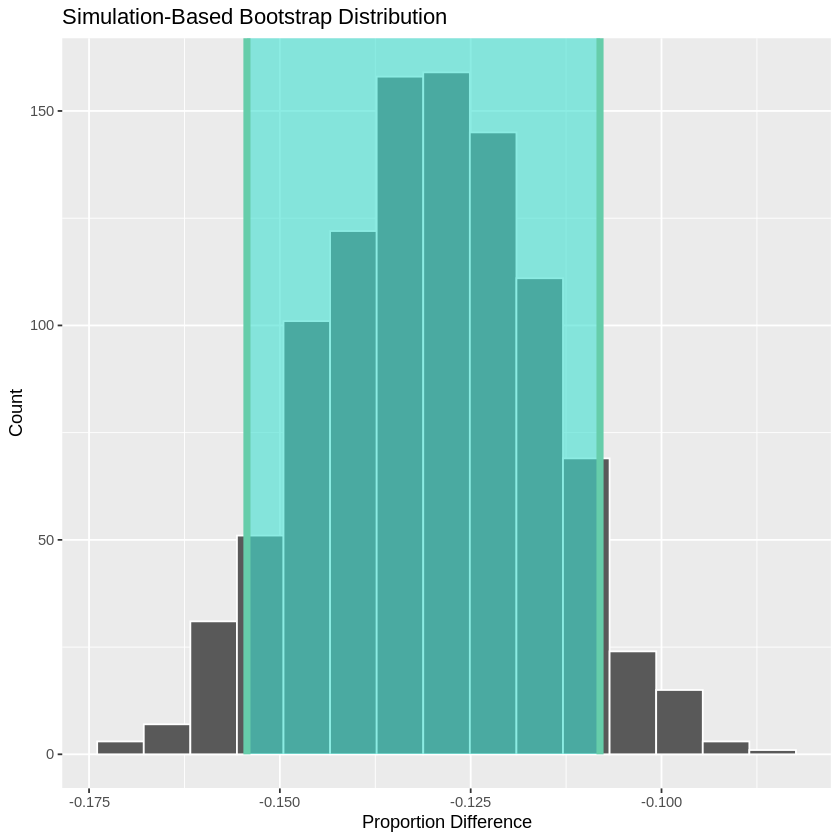

In [69]:
# Generating bootstrap distribution

rating_bootstrap_dist <- group_rating_data |>
    specify(formula = quality ~ type, success = "Good") |>
    generate(reps = 1000, type = "bootstrap") |>
    calculate(stat = 'diff in props', order = c("Red", "White"))

# Getting a 90% confidence level from the bootstrap distribution

rating_ci <- rating_bootstrap_dist |>
    get_ci(level = 0.9, type = "percentile")

print("Table 15: 90% confidence interval for proportion difference.")
rating_ci

# Visualizing the confidence interval and bootstrapping distribution

dist_ci_plot <- visualize(rating_bootstrap_dist) +
    shade_ci(endpoints = rating_ci) +
    labs(x = "Proportion Difference", y = "Count")

print("Figure 5: Bootstrap distribution and 90% confidence interval.")
dist_ci_plot

## Discussion

### Wine Variant and pH Level Summary

For our hypothesis test to answer our first question, we found that the p-value is $< 0.001$. Thus, we reject the null hypothesis that the mean pH level of the red variant of the "Vinho Verde" wine is equal to the mean pH level of the white variant at the $10\%$ significance level. Furthermore, we constructed a $90\%$ confidence interval and saw that the hypothesized value (i.e. a difference in means of zero) falls outside the interval and this result is consistent with the hypothesis test result. We can conclude that the test is statistically significant. 

Such a small p-value indicates that the null hypothesis is very incompatible with our sample data. Given this result and the observed positive mean difference, there is evidence to suggest that the pH level of a "Vinho Verde" wine is associated with the wine's variant. Specifically, a red wine variant is more likely to have a higher pH than a white wine variant. 

This result is expected based on the existing literature about this topic. Also, these findings could serve as a reference to wine producers to better understand what acidity level the environment in which each type of wine is fermented should have in order to produce a high-quality wine.

### Wine Variant and Quality Summary

For our hypothesis test to answer our second question, we also found that the p-value is $< 0.001$. Thus, we reject the null hypothesis that the proportion of "Vinho Verde" red wines with a good rating is equal to the proportion of white wines with a good rating at the $10\%$ significance level. Moreover, the hypothesized value (i.e. a difference in proportion of zero) falls outside the $90\%$ confidence interval we constructed which is consistent with the hypothesis test result.We can conclude that the test is statistically significant. 

Similar, to the hypothesis test for the first question, this very small p-value suggests that the null hypothesis is discordant with our sample data. Given this conclusion and the observed negative proportion difference, there is evidence to suggest that the quality of a "Vinho Verde" wine is associated with the type of wine. Specifically, "Vinho Verde" white wines may be more likely to receive a good quality rating than the red wine variant. 

This result was not what we expected since we believed that both the red and white variants of the "Vinho Verde" wine had the same production standard. This may be attributable to white wines being a a specialty of this producer or to a more favourable environment to produce white wines over red ones. These findings could serve as a reference to the "Vinho Verde" producers to better know in which wine variant to focus their investments.

### Future Questions

Some future questions may be asked related to these topics and our results are the following:
- Could the pH level be a useful feature in wine classification tasks?
- How the pH of other types of wine relate to red and white wines?
- Which variables of the environment where a wine is produced favour each wine type?
- Should the "Vinho Verde" wine producers focus more their investments in the production of white wines instead of red wines?

## References

Cortez, P., Cerdeira, A., Almeida, F., Matos, T., &amp; Reis, J. (2009). Modeling wine preferences by data mining from physicochemical properties. Decision Support Systems, 47(4), 547–553. https://doi.org/10.1016/j.dss.2009.05.016

O’Donnell, D. (2022, May 13). Improving the taste and color of wine with PH control: Sensorex. Sensorex Liquid Analysis Technology. https://sensorex.com/ph-improve-taste-color-wine/?v=3e8d115eb4b3

Tanthanuch, S., Kukiattrakoon, B., Peerasukprasert, T., Chanmanee, N., Chaisomboonphun, P., &amp; Rodklai, A. (2016). The effect of red and white wine on color changes of nanofilled and nanohybrid resin composites. Restorative Dentistry &amp;amp; Endodontics, 41(2), 130. https://doi.org/10.5395/rde.2016.41.2.130

Darias-Martı́n, J., Socas-Hernández, A., Dı́az-Romero, C., &amp; Dı́az-Dı́az, E. (2003). Comparative study of methods for determination of titrable acidity in wine. Journal of Food Composition and Analysis, 16(5), 555–562. https://doi.org/10.1016/s0889-1575(03)00032-2